In [1]:
from fastai.vision.all import *
from fastai.vision.widgets import *
from google.colab import files
from IPython.display import Image

In [2]:
# Download the cat image dataset
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
!unzip cats_and_dogs_filtered.zip

# Define the categories of cats
cat_categories = ["orange cat", "black cat", "white cat"]

# Define the data loader
data = ImageDataLoaders.from_folder(
    "cats_and_dogs_filtered/train/",
    valid_pct=0.2,
    seed=42,
    item_tfms=Resize(224),
    batch_tfms=aug_transforms(),
)

--2023-04-21 20:58:28--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.146.128, 209.85.147.128, 142.250.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.146.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   116MB/s    in 0.6s    

2023-04-21 20:58:29 (116 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]

Archive:  cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2

In [3]:
# Define the neural network model
learn = cnn_learner(data, resnet34, metrics=error_rate)
# Fine-tune the model on the cat image dataset
learn.fine_tune(epochs=4)

/usr/local/lib/python3.9/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pt

epoch,train_loss,valid_loss,error_rate,time
0,0.353826,0.058530,0.017500,00:18


epoch,train_loss,valid_loss,error_rate,time
0,0.121473,0.071728,0.015000,00:14
1,0.082719,0.113923,0.025000,00:14
2,0.062946,0.018666,0.012500,00:15
3,0.042961,0.022124,0.012500,00:16


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pickle
# Export the trained model as a .pkl file
with open('/content/drive/MyDrive/Ingles/cat_classifier.pkl', 'wb') as f:
    pickle.dump(learn, f)

In [6]:
# Define a function to classify an image
def classify_image(image_file):
    # Load the image
    img = PILImage.create(image_file)

    # Classify the image
    pred, pred_idx, probs = learn.predict(img)

    # Display the image and the predicted category
    display(img.to_thumb(224,224))
    print(f"Prediction: {cat_categories[pred_idx]}, Probability: {probs[pred_idx]:.04f}")

Saving teste-gato.jpg to teste-gato.jpg


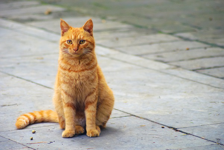

Prediction: orange cat, Probability: 0.9997


In [7]:
# Here you can upload an image and test the classifier
uploaded = files.upload()
for filename in uploaded.keys():
    classify_image(filename)

##Deploying

In [8]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 51.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.7/129.7 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 kB 12.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
  Attempting uninstall: jsonschema
    Found existing installation: jsonschema 4.3.3
    Uninstalling jsonschema-4.3.3:
      Successfully uninstalled jsonschema-4.3.3


Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
      voila 0.4.0 OK
